In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [8]:
df2=df.drop(columns=['CustomerID','Gender','Age'])

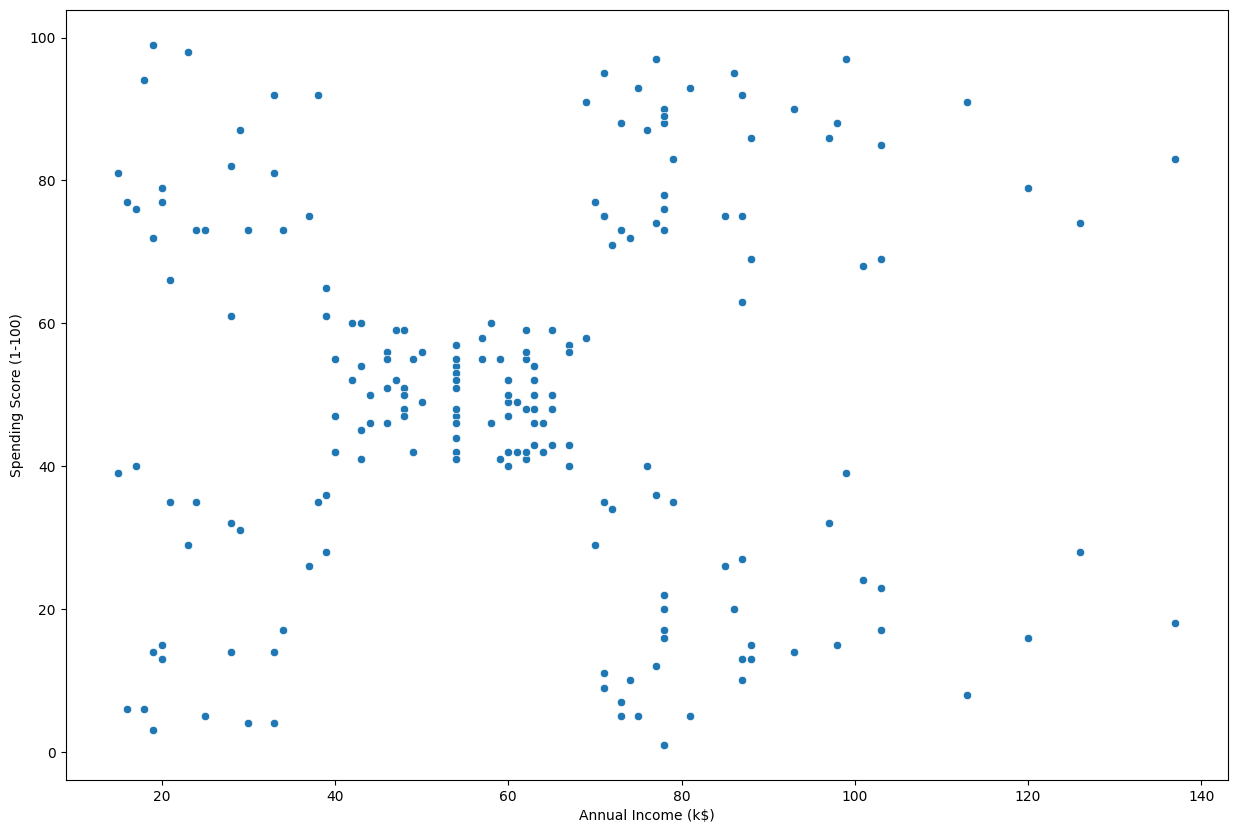

In [14]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

**Finding best k value using elbow method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

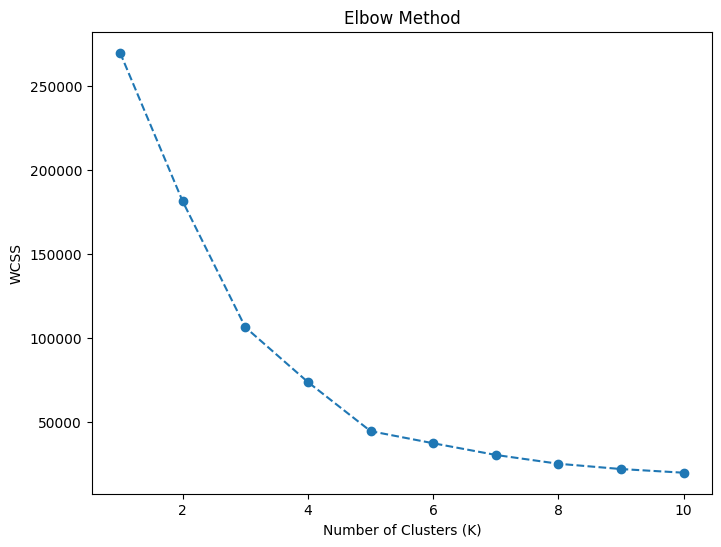

In [15]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

**from Silhouette Score:**

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score  # Import silhouette_score


silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df2)  # Assuming df2 is your data
    silhouette_scores.append(silhouette_score(df2, kmeans.labels_))  # Use df2 as data

best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 to account for starting at K=2
print(f'Best K value based on Silhouette Score: {best_k}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Best K value based on Silhouette Score: 5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


in both the cases we get 5 as our best k value

In [37]:
from sklearn.cluster import KMeans

# Assuming df2 is your data and k is the number of clusters you want
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
Y = kmeans.fit_predict(df2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
df2.shape

(200, 2)

In [39]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [42]:
unique_labels = set(Y)
num_clusters = len(unique_labels)

print(f'Unique Cluster Labels: {unique_labels}')
print(f'Number of Clusters: {num_clusters}')

Unique Cluster Labels: {0, 1, 2, 3, 4}
Number of Clusters: 5


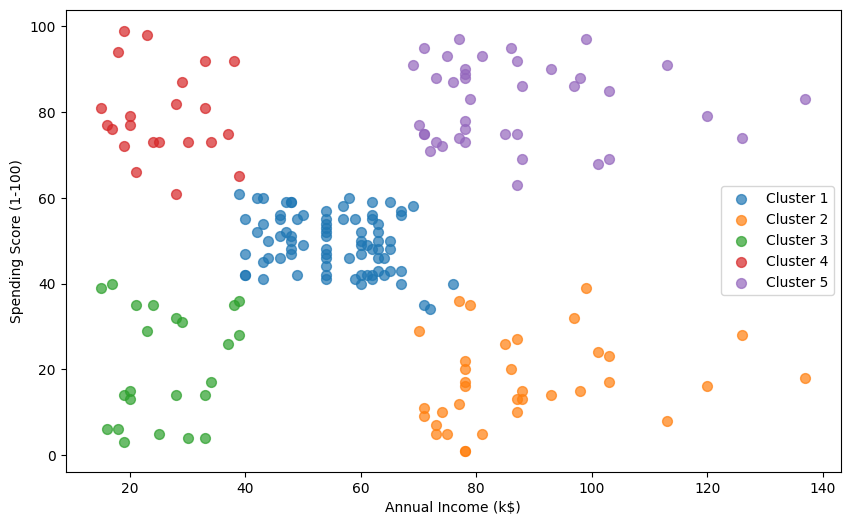

In [50]:
import matplotlib.pyplot as plt

# Create a scatter plot for all clusters in one plot
plt.figure(figsize=(10, 6))

# Iterate through each cluster label
for cluster_label in range(num_clusters):
    # Filter data points belonging to the current cluster
    cluster_data = df2[Y == cluster_label]

    # Access the columns 'Annual Income (k$)' and 'Spending Score (1-100)'
    cluster_income = cluster_data['Annual Income (k$)']
    cluster_score = cluster_data['Spending Score (1-100)']

    # Create a scatter plot for the current cluster with a unique color
    plt.scatter(
        cluster_income, cluster_score,
        s=50, label=f'Cluster {cluster_label + 1}',
        alpha=0.7  # Optional: Adjust the transparency of points
    )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['CustomerID','Gender'], axis=1)
y = df['Spending Score (1-100)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
kmeans = KMeans(n_clusters=5)
X_train['cluster'] = kmeans.fit_predict(X_train)
X_test['cluster'] = kmeans.predict(X_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


dt_classifier = DecisionTreeClassifier(random_state=42)


dt_classifier.fit(X_train, y_train)


y_pred_dt = dt_classifier.predict(X_test)


accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Model Accuracy: {accuracy_dt:.2f}')



Decision Tree Model Accuracy: 0.47
